Considere un sistema de comunicaciones en donde el transmisor transmite dos hipótesis H igualmente probables. Bajo la hipótesis  H=0 , la señal observada  Y  por el receptor a la salida del canal es igual a  -1+Z   donde  Z  es una variable aleatoria Gaussiana  N(0,2) .

Bajo la hipótesis  H=1 ,  Y  viene dado por 2+Z  .

1. Exprese matemáticamente las funciones de densidad de probabilidad condicional  $f_{Y|H}(y|0)$  y  $f_{Y|H}(y|1) .$
2. Realice un programa en una Jupyter Notebook que dibuje la funciones de densidad de probabilidad  $f_{Y|H}(y|0)$  y  $f_{Y|H}(y|1) .$
3. Determine cualitativamente el nivel de decisión óptimo.  Bajo que regla la decisión es óptima?
4. Determine cuantitativamente el nivel de decisión óptimo.
5. Exprese la probabilidad de error $P_e$ en términos de la función Q.
6. Utilice el siguiente código en Python para calcular el valor de Q con los argumentos obtenidos en el punto anterior:
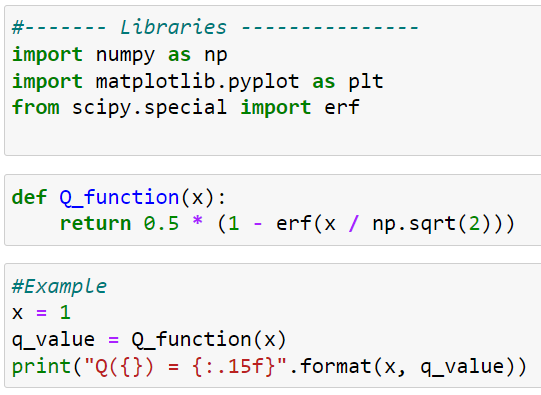

# Resultados
---
1. Si tienen una distribución normal, sus funciones son:\
    $f_{Y|H}(y|0) = \frac{1}{\sigma*\sqrt{2\pi}}e^{\frac{-(x+1)^2}{2\sigma^2}}$\
    $f_{Y|H}(y|1) = \frac{1}{\sigma*\sqrt{2\pi}}e^{\frac{-(x-2)^2}{12\sigma^2}}$


2. Se dibujan las funciónes de probabilidad condicional

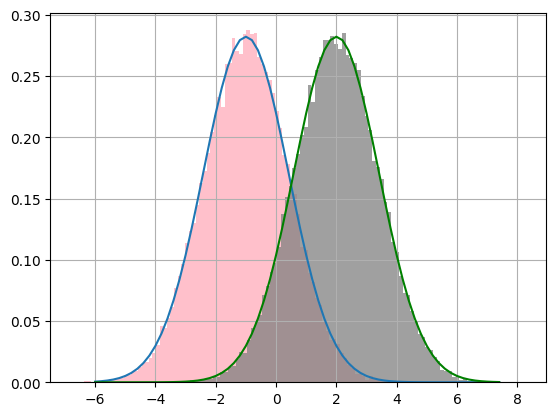

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
intentos = 50000

f1 = np.random.normal(-1,np.sqrt(2),intentos)
f2 = np.random.normal(2,np.sqrt(2),intentos)

X = np.arange(-6,7.5,0.2)
ff1 = (1/(np.sqrt(2*np.pi*2)))*np.exp(-(pow((X+1),2)/(2*2)))
ff2 = (1/(np.sqrt(2*np.pi*2)))*np.exp(-(pow((X-2),2)/(2*2)))

plt.plot(X,ff1)
plt.plot(X,ff2,color = "green")

plt.hist(f1,bins = 100,density = True, color = "pink")
plt.hist(f2,bins = 100,density = True, color = "gray", alpha = 0.75)
plt.grid()
plt.show()

3. Para calcular el nivel de decisión de forma cualitativa, se podría trazar una línea en donde las funciones se cortan, como para intentar aproximar el valor



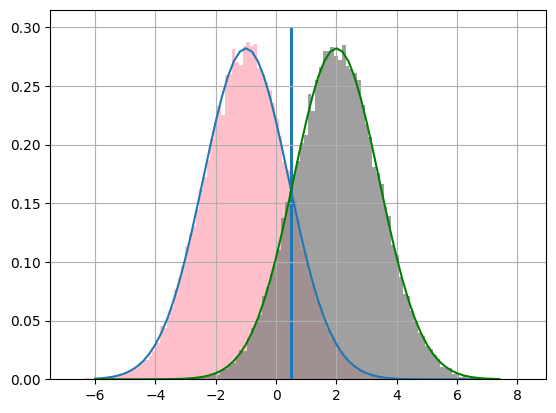

In [136]:
plt.plot(X,ff1)
plt.plot(X,ff2,color = "green")

plt.hist(f1,bins = 100,density = True, color = "pink")
plt.hist(f2,bins = 100,density = True, color = "gray", alpha = 0.75)
plt.bar([.5],[.3],0.1) #Quitar para mostrar una barra justo donde se calculó el nivel de decisión
plt.grid()
plt.show()

4. Dado que las hipótesis son igualmente probables, podemos usar la regla ML.

    $P_{Y|H}(y|1)  \frac{\overset{\hat{H} = 1}{\geqslant}}{\underset{\hat{H} = 0}{<}} P_{Y|H}(y|0)$\
    $\frac{1}{\sigma*\sqrt{2\pi}}e^{\frac{-(x-2)^2}{2\sigma^2}}$ $\frac{\overset{\hat{H} = 1}{\geqslant}}{\underset{\hat{H} = 0}{<}}$ $\frac{1}{\sigma*\sqrt{2\pi}}e^{\frac{-(x+1)^2}{2\sigma^2}}$\
    Operando, se llega a\
    $-(x-2)^2 $ $\frac{\overset{\hat{H} = 1}{\geqslant}}{\underset{\hat{H} = 0}{<}}$ $-(x+1)^2$\
    Intercambiando lados para no cambiar la igualdad, y desarrollando el binomio cuadrado\
    $x^2+2x+1$ $\frac{\overset{\hat{H} = 1}{\geqslant}}{\underset{\hat{H} = 0}{<}}$ $x^2-4x+4$\
    $6x$ $\frac{\overset{\hat{H} = 1}{\geqslant}}{\underset{\hat{H} = 0}{<}}$ $3$\
    Entonces: $x \frac{\overset{\hat{H} = 1}{\geqslant}}{\underset{\hat{H} = 0}{<}} 0.5 = \frac{3}{6}$


5. Probabilidad de Error:\
    $Q(x) = \frac{1}{\sqrt{2\pi}}\int_{X}^{\infty}e^{\frac{-\zeta^2}{2}}d\zeta$\
    Donde $X = \frac{x-\mu}{\sigma}$, con x = umbral, $\mu$ = media de una de las fuciones y $\sigma$ = desviación estandar\
    Entonces para $H_0$\
    $Q(0) = \frac{1}{\sqrt{2\pi}}\int_{\frac{3\sqrt{2}}{4}}^{\infty}e^{\frac{-\zeta^2}{2}}d\zeta = 0.144$ Como las probabilidades son iguales, al sumarse y multiplicarse por 0.5 la probabilidad total es igual a la de cada cola, entonces\
    $P_e = 0.144$

6. Calculo usando la librería scipy\
    Y usando el método montecarlo

In [137]:
def Q(x):
    return 0.5*(1-erf(x/np.sqrt(2)))

umbral = 1.06
print("Probabilidad de error:",Q(umbral))

Probabilidad de error: 0.1445722996639096


Probabilidad de Error:  0.14449999999999996


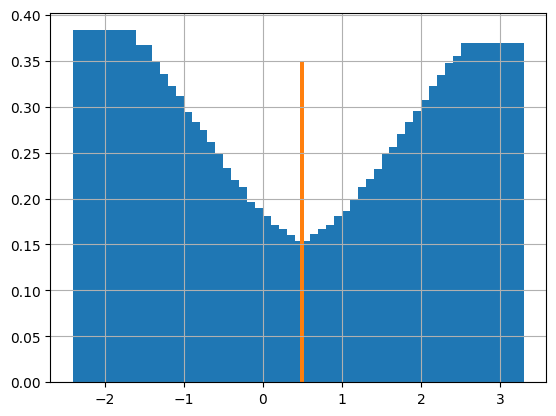

In [138]:
umbral = 0.5
def error(umbral):
    H = np.random.randint(0,2,intentos)
    Z = np.random.normal(0,np.sqrt(2),intentos)
    Y = [-1+Z[n] if H[n] == 0 else 2+Z[n] for n in range(intentos)]
    Y_Deco = [0 if Y[n]<umbral else 1 for n in range(intentos)]

    correctos = 0
    for n in range(intentos):
        if(H[n] == Y_Deco[n]):
            correctos+=1

    return 1-correctos/intentos


print("Probabilidad de Error: ",error(umbral))

# Se añade un gráfico de barras para ver como se comporta la probabilidad de error en base
#a diferentes niveles de decisión
errores = [error(-2+n*.1) for n in range(50)]
plt.bar([-2+n*.1 for n in range(50)],errores)
plt.bar([0.5],[0.35],[0.05])
plt.grid()
plt.show()